In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you crea

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


# Mnist Digit Dataset

In [89]:
import numpy as np
import pandas as pd

import sklearn

In [90]:
# digits = load_digits()
digits = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [61]:
digits

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [91]:
x = digits.iloc[:,1:]

In [63]:
x.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
x.shape

(42000, 784)

In [92]:
x = x.values.reshape(x.shape[0], 28, 28, 1)

In [66]:
x.shape

(42000, 28, 28, 1)

In [93]:
y = digits.iloc[:,0:1]
y.head()

,label
0,1
1,0
2,1
3,4
4,0


In [94]:
y = y.to_numpy()

# Flatten the array to 1D using ravel
y = y.ravel()

In [69]:
y

array([1, 0, 1, ..., 7, 6, 9])

In [95]:
from tensorflow.keras.utils import to_categorical
y = to_categorical(y, num_classes=10)
print(y.shape)

(42000, 10)


In [96]:
y = y.reshape(-1, 10)

In [97]:
y.shape

(42000, 10)

In [98]:
### Splitting train test
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=9)

In [83]:
x_train[0]

We also have to scale it but since i am using perceptron model which works on linear only so i am avoiding this.

eg: x = x / 255.0

# PERCEPTRON

In [75]:
### Building model
from sklearn.linear_model import Perceptron

In [46]:
perceptron = Perceptron()
perceptron.fit(x_train,y_train)

In [37]:
print('Training accurcay of perceptron')
print(perceptron.score(x_train,y_train))

print('Test accurcay of perceptron')
print(perceptron.score(x_test,y_test))

predicted_train = perceptron.predict(x_train)
predicted_test = perceptron.predict(x_test)

from sklearn.metrics import confusion_matrix , classification_report ,accuracy_score

print('Training accurcay' ,accuracy_score(y_train,predicted_train))
print('Test accurcay' , accuracy_score(y_test,predicted_test))

print("***********"*5)
print('classification_report Training')
print(classification_report(y_train,predicted_train))

print('classification_report Test')
print(classification_report(y_test,predicted_test))


# print(confusion_matrix(y_train,predicted_train))

# print(confusion_matrix(y_test,predicted_test))

Training accurcay of perceptron
0.8972321428571428
Test accurcay of perceptron
0.8703571428571428
Training accurcay 0.8972321428571428
Test accurcay 0.8703571428571428
*******************************************************
classification_report Training
              precision    recall  f1-score   support

           0       0.95      0.98      0.96      3331
           1       0.89      0.99      0.94      3716
           2       0.96      0.84      0.90      3348
           3       0.90      0.86      0.88      3466
           4       0.91      0.92      0.92      3264
           5       0.79      0.90      0.84      3028
           6       0.95      0.95      0.95      3334
           7       0.94      0.89      0.91      3546
           8       0.90      0.70      0.79      3228
           9       0.81      0.92      0.86      3339

    accuracy                           0.90     33600
   macro avg       0.90      0.90      0.90     33600
weighted avg       0.90      0.90      0.

In [ ]:
# Good model with no bias and no variance. Rosenblatt was good for this model

(42000, 784)

# CNN

In [170]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense , Dropout
from keras import backend as K


from keras.regularizers import l2
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Clear the current Keras session
K.clear_session()

In [171]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.5))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.5))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [172]:
# Set the batch size for the training
batch_size = 64

# Set the maximum number of epochs for the training
epochs = 300

# Define the optimizer (Adam)
optimizer = Adam(learning_rate=0.0005)

# Compile the model with the defined optimizer, loss function, and metrics
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Add ReduceLROnPlateau callback
# Here, the learning rate will be reduced by half (factor=0.5) if no improvement in validation loss is observed for 10 epochs
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=0.00001)

# Add EarlyStopping callback
# Here, training will be stopped if no improvement in validation loss is observed for 40 epochs.
# The `restore_best_weights` parameter ensures that the model weights are reset to the values from the epoch
# with the best value of the monitored quantity (in this case, 'val_loss').
early_stopping = EarlyStopping(monitor='val_loss', patience=40, restore_best_weights=True, verbose=1)


In [173]:
history = model.fit(x_train, y_train, batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test),
          callbacks=[reduce_lr, early_stopping], 
          verbose=2)

Epoch 1/300
525/525 - 6s - 12ms/step - accuracy: 0.5020 - loss: 3.1841 - val_accuracy: 0.8571 - val_loss: 0.5690 - learning_rate: 5.0000e-04
Epoch 2/300
525/525 - 1s - 3ms/step - accuracy: 0.8181 - loss: 0.5844 - val_accuracy: 0.9425 - val_loss: 0.2206 - learning_rate: 5.0000e-04
Epoch 3/300
525/525 - 1s - 3ms/step - accuracy: 0.9051 - loss: 0.3125 - val_accuracy: 0.9607 - val_loss: 0.1457 - learning_rate: 5.0000e-04
Epoch 4/300
525/525 - 1s - 3ms/step - accuracy: 0.9308 - loss: 0.2247 - val_accuracy: 0.9688 - val_loss: 0.1134 - learning_rate: 5.0000e-04
Epoch 5/300
525/525 - 1s - 3ms/step - accuracy: 0.9454 - loss: 0.1759 - val_accuracy: 0.9735 - val_loss: 0.0956 - learning_rate: 5.0000e-04
Epoch 6/300
525/525 - 1s - 3ms/step - accuracy: 0.9550 - loss: 0.1470 - val_accuracy: 0.9767 - val_loss: 0.0846 - learning_rate: 5.0000e-04
Epoch 7/300
525/525 - 1s - 3ms/step - accuracy: 0.9606 - loss: 0.1300 - val_accuracy: 0.9781 - val_loss: 0.0791 - learning_rate: 5.0000e-04
Epoch 8/300
525/525

In [136]:
history = model.fit(x_train, y_train, epochs=15, batch_size=32, validation_data = (x_test , y_test))

Epoch 1/15
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.5357 - loss: 5.5477 - val_accuracy: 0.9524 - val_loss: 0.1642
Epoch 2/15
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9179 - loss: 0.2728 - val_accuracy: 0.9695 - val_loss: 0.1171
Epoch 3/15
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9446 - loss: 0.1790 - val_accuracy: 0.9755 - val_loss: 0.0777
Epoch 4/15
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9544 - loss: 0.1467 - val_accuracy: 0.9792 - val_loss: 0.0661
Epoch 5/15
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9596 - loss: 0.1265 - val_accuracy: 0.9792 - val_loss: 0.0672
Epoch 6/15
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9633 - loss: 0.1155 - val_accuracy: 0.9829 - val_loss: 0.0580
Epoch 7/15
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9695 - loss: 0.0991 - val_accuracy: 0.9813 - val_loss: 0.0590
Epoch 8/15
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9707 - loss: 0.0967 - 

In [174]:
# Check accuracy
train_accuracy = history.history['accuracy']  # Training accuracy
val_accuracy = history.history['val_accuracy']  # Validation accuracy
train_loss = history.history['loss']  # Training loss
val_loss = history.history['val_loss']  # Validation loss

print('train_accuracy' , max(train_accuracy))
print('val_accuracy' , max(val_accuracy))
print('train_loss' , min(train_loss))
print('val_loss' , min(val_loss))

train_accuracy 0.9967857003211975
val_accuracy 0.9922618865966797
train_loss 0.009329454973340034
val_loss 0.029651660472154617


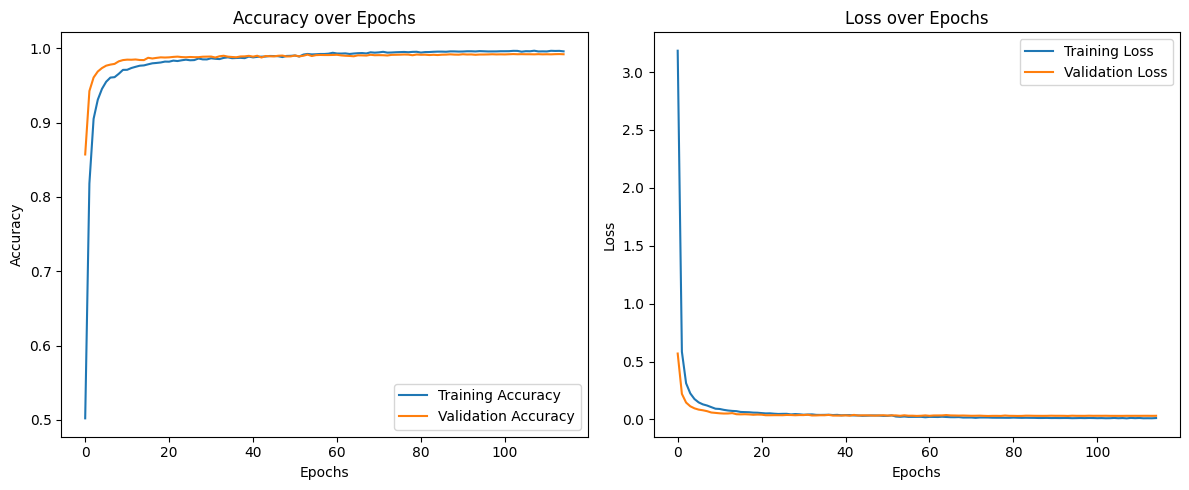

In [175]:
import matplotlib.pyplot as plt

# Plotting Accuracy
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [176]:
test = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')

In [177]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [178]:
test = test.values.reshape(test.shape[0], 28, 28, 1)

In [179]:
test.shape

(28000, 28, 28, 1)

In [180]:
test_prediction = model.predict(test)

875/875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [181]:
test_prediction

array([[3.2521430e-14, 7.4265738e-10, 1.0000000e+00, ..., 1.6062073e-10,
        1.2200325e-11, 1.3715819e-13],
       [1.0000000e+00, 2.2636617e-12, 5.3173721e-10, ..., 9.6901254e-10,
        1.1215370e-08, 8.7904777e-09],
       [5.0963761e-10, 3.0973304e-09, 4.3370481e-08, ..., 3.8007292e-06,
        9.3539318e-05, 9.9989939e-01],
       ...,
       [8.3163821e-18, 3.9609278e-11, 9.8886589e-13, ..., 2.2004376e-11,
        2.3565796e-09, 5.0233456e-10],
       [4.5308798e-08, 9.1274854e-09, 3.2061121e-07, ..., 5.7385449e-05,
        2.0063108e-05, 9.9931228e-01],
       [1.1155041e-15, 2.3952123e-12, 1.0000000e+00, ..., 8.3909236e-13,
        2.1605081e-12, 2.0990275e-15]], dtype=float32)

In [182]:
test_prediction = np.argmax(test_prediction, axis=1)

In [183]:
test_prediction

array([2, 0, 9, ..., 3, 9, 2])

In [184]:
test.shape

(28000, 28, 28, 1)

In [185]:
test_prediction.shape

(28000,)

In [186]:
submission = pd.read_csv('/kaggle/input/digit-recognizer/sample_submission.csv')

In [187]:
submission.head()

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [188]:
for i in range(len(submission)):
    submission.loc[i , 'Label'] = test_prediction[i]

In [189]:
submission.to_csv('submission5_cnn.csv', index=False)  # 'index=False' prevents saving the index column